# Real Estate Price Prediction - using Linear Regression Model

In [1]:
# Importing packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import KFold 
from sklearn.feature_selection import f_regression as fs
import pylab
import math

### Read tha Data:

In [2]:
# importing data
umesh = pd.read_csv("C:/Users/HP/Desktop/python_project/train.csv")

### Data Details

In [3]:
umesh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
umesh.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Target Variable Separation

In [5]:
# dependent variable is  salesprice so separating dependent and independent variable
target = umesh['SalePrice']
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


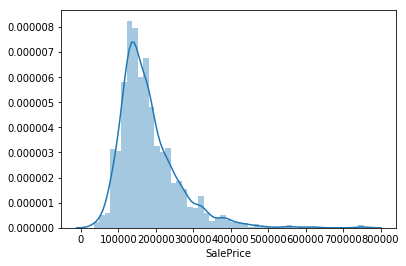

In [6]:
# check th distribution of target variable
sns.distplot(target,hist=True)

# the distribution seems to be right skewed,

### Log Transformation:

In [7]:
# to make it normally distibuted "log" transformation need to be applied on target variable,
umesh_tar_log = np.log(target)

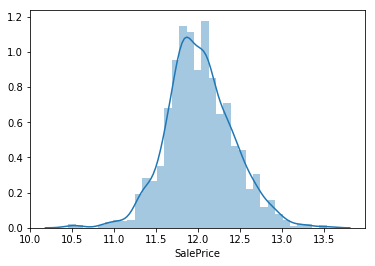

In [8]:
sns.distplot(umesh_tar_log,hist=True)

# after applying "log" transformation target variable is converted in normally distributed

### Quantile-Quantile plot

Text(0, 0.5, 'Sample quantiles')

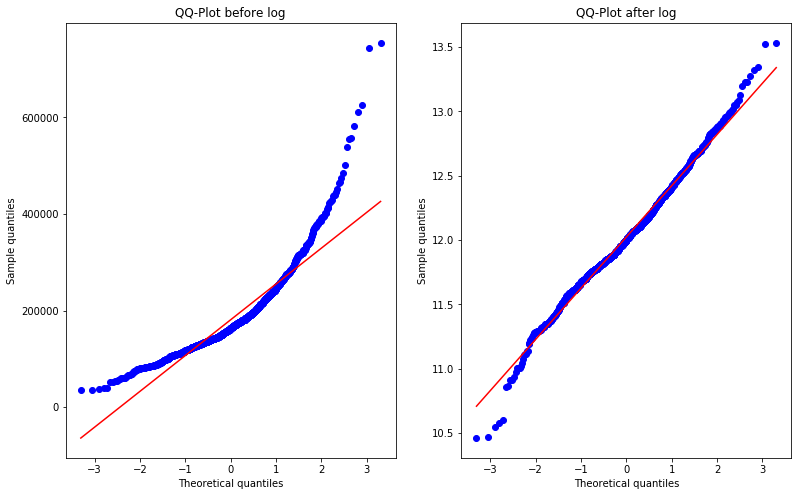

In [9]:
##QQ-Plot before log-transformation
fig = plt.figure(figsize=(13, 8))

ax1 = plt.subplot(121)
res = stats.probplot(umesh['SalePrice'], plot=plt)
plt.title('QQ-Plot before log')
plt.ylabel('Sample quantiles')

ax1 = plt.subplot(122)
a = np.log(umesh["SalePrice"])
res = stats.probplot(a, plot=plt)
plt.title('QQ-Plot after log')
plt.ylabel('Sample quantiles')

In [10]:
# drop target variable from dataset
raw_data = umesh
umesh = umesh.drop(["SalePrice"], axis=1)
umesh.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Converting variables into "Categorical" type

In [11]:
# The building class"MSSubClass"  is a categorical variable but represented in number format so need to be converted in category
umesh['MSSubClass'] = umesh['MSSubClass'].apply(str)

umesh['OverallCond'] = umesh['OverallCond'].astype(str)

# same is applied for the years and months sold
umesh['YrSold'] = umesh['YrSold'].astype(str)
umesh['MoSold'] = umesh['MoSold'].astype(str)

#### converting total square feet area into one variable because overall area is calculated by adding whole square feet area;

In [12]:
# also the overall squre feet area is calculated by addding all rooms square feet area
umesh['TotalSF'] = umesh['TotalBsmtSF'] + umesh['1stFlrSF'] + umesh['2ndFlrSF']

# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id ,which is not required 
umesh = umesh.drop(["TotalBsmtSF"], axis=1)
umesh = umesh.drop(["1stFlrSF"], axis=1)
umesh = umesh.drop(["2ndFlrSF"], axis=1)
umesh = umesh.drop(["Id"], axis=1)


### All Categorical Variables:

In [13]:
# getting all factor variables
factor_x = [col for col in umesh.columns.values if umesh[col].dtype == 'object']
    
data_cat = umesh[factor_x]

### All Numerical Variables:

In [14]:
# getting all numeric variables

data_num = umesh.drop(factor_x,axis=1)

### Mean Normalization

In [15]:
data_num = ((data_num - data_num.mean())/(data_num.max() - data_num.min()))
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1.201000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.452000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-2.249507e-17,-4.281262e-18,1.946692e-17,2.267735e-16,1.541119e-15,5.507150e-17,-1.634917e-18,1.193870e-17,-1.547468e-17,1.972357e-19,...,7.551037e-17,-6.957905e-18,-1.817420e-17,6.330553e-18,-1.849738e-17,1.644423e-18,1.672939e-17,4.815462e-17,9.101357e-19,-1.775715e-17
std,8.316696e-02,4.665342e-02,1.536663e-01,2.188616e-01,3.440901e-01,1.131664e-01,8.081114e-02,1.094432e-01,1.891554e-01,8.500539e-02,...,1.868288e-01,1.507792e-01,1.462530e-01,1.211262e-01,1.107231e-01,5.771128e-02,1.161613e-01,5.444080e-02,3.200794e-02,7.196658e-02
min,-1.679793e-01,-4.308036e-02,-5.665906e-01,-7.193319e-01,-5.810959e-01,-6.480329e-02,-7.860378e-02,-3.158027e-02,-2.428255e-01,-1.021769e-02,...,-4.417808e-01,-3.335544e-01,-1.099703e-01,-8.530215e-02,-3.977194e-02,-6.711789e-03,-3.137700e-02,-3.738352e-03,-2.805745e-03,-1.955727e-01
25%,-3.784232e-02,-1.385089e-02,-1.221461e-01,-1.251290e-01,-2.977626e-01,-6.480329e-02,-7.860378e-02,-3.158027e-02,-1.473632e-01,-1.021769e-02,...,-1.917808e-01,-9.765877e-02,-1.099703e-01,-8.530215e-02,-3.977194e-02,-6.711789e-03,-3.137700e-02,-3.738352e-03,-2.805745e-03,-4.883067e-02
50%,-3.595748e-03,-4.853248e-03,-1.103501e-02,1.255211e-02,1.522374e-01,-6.480329e-02,-1.065551e-02,-3.158027e-02,-3.841627e-02,-1.021769e-02,...,5.821918e-02,4.950538e-03,-1.099703e-01,-3.959831e-02,-3.977194e-02,-6.711789e-03,-3.137700e-02,-3.738352e-03,-2.805745e-03,-8.149293e-03
75%,3.407549e-02,5.069863e-03,1.000761e-01,2.082043e-01,3.189041e-01,3.894671e-02,4.759218e-02,-3.158027e-02,1.030649e-01,-1.021769e-02,...,5.821918e-02,7.265153e-02,8.606240e-02,3.901230e-02,-3.977194e-02,-6.711789e-03,-3.137700e-02,-3.738352e-03,-2.805745e-03,3.826864e-02
max,8.320207e-01,9.569196e-01,4.334094e-01,2.806681e-01,4.189041e-01,9.351967e-01,9.213962e-01,9.684197e-01,7.571745e-01,9.897823e-01,...,5.582192e-01,6.664456e-01,8.900297e-01,9.146979e-01,9.602281e-01,9.932882e-01,9.686230e-01,9.962616e-01,9.971943e-01,8.044273e-01


In [16]:
# columns in dataset
col = list(umesh.columns)
print(col)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold'

### Checking Null, NA, Zero and Blank Values;

In [17]:
# check and handling for NULLS, blanks and zeroes special character and NA vlaues in  Dataset 

for c in col:
    if (len(umesh[c][umesh[c].isnull()])) > 0:
        print("WARNING: Column '{}' has NULL values".format(c))

    if (len(umesh[c][umesh[c] == 0])) > 0:
        print("WARNING: Column '{}' has value = 0".format(c))
        
    if (len(umesh[c][umesh[c].isna()])) > 0:
        print("Warning: Column '{}' has Na values".format(c))

### Handling Null Values:

In [18]:
# to handle null values check for total null values
pd.set_option("display.expand_frame_repr",False)
umesh_null = umesh.isnull().sum()
print(umesh_null)

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

### Drop the Variables with more Null values

In [19]:
# as from above null value count check, we observed that variables having null values more than 85% 0r 95% we can drop them
umesh= umesh.drop("PoolQC",axis=1)
umesh= umesh.drop("Fence",axis=1)
umesh= umesh.drop("MiscFeature",axis=1)
umesh= umesh.drop("Alley",axis=1)
umesh= umesh.drop("FireplaceQu",axis=1)
umesh= umesh.drop("GarageType",axis=1)
umesh= umesh.drop("GarageYrBlt",axis=1)
umesh= umesh.drop("GarageFinish",axis=1)
umesh= umesh.drop("GarageQual",axis=1)
umesh= umesh.drop("GarageCond",axis=1)
umesh= umesh.drop("MoSold",axis=1)   #removed after checking feature selection score
umesh= umesh.drop("YrSold",axis=1)   #removed after checking feature selection score
len(umesh.columns)

65

### Density Plot:

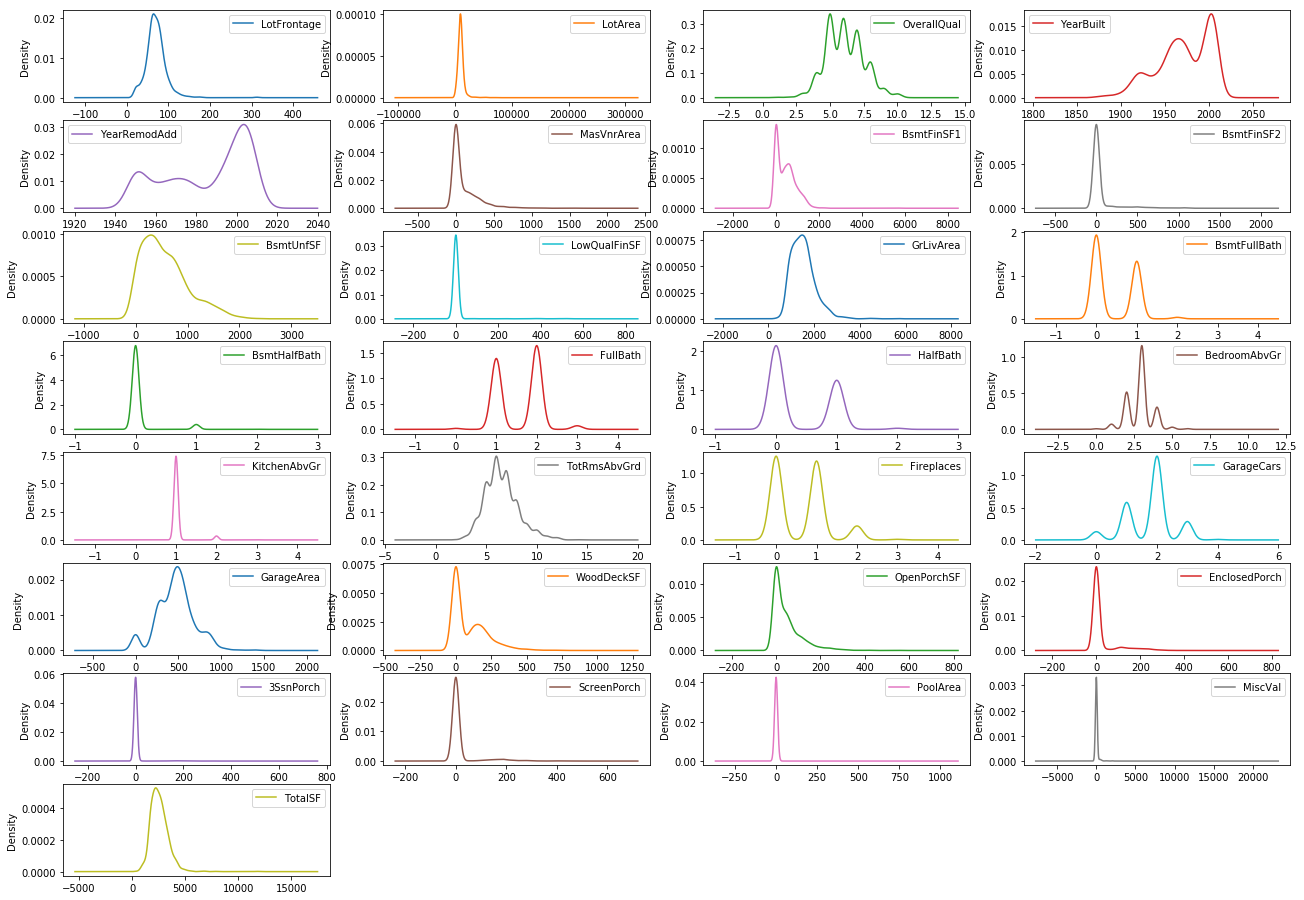

In [20]:
#Density plots
den_overview = umesh.plot(kind='density', subplots=True, layout=(10, 4), sharex=False, figsize=(22,20))

### Histograms:

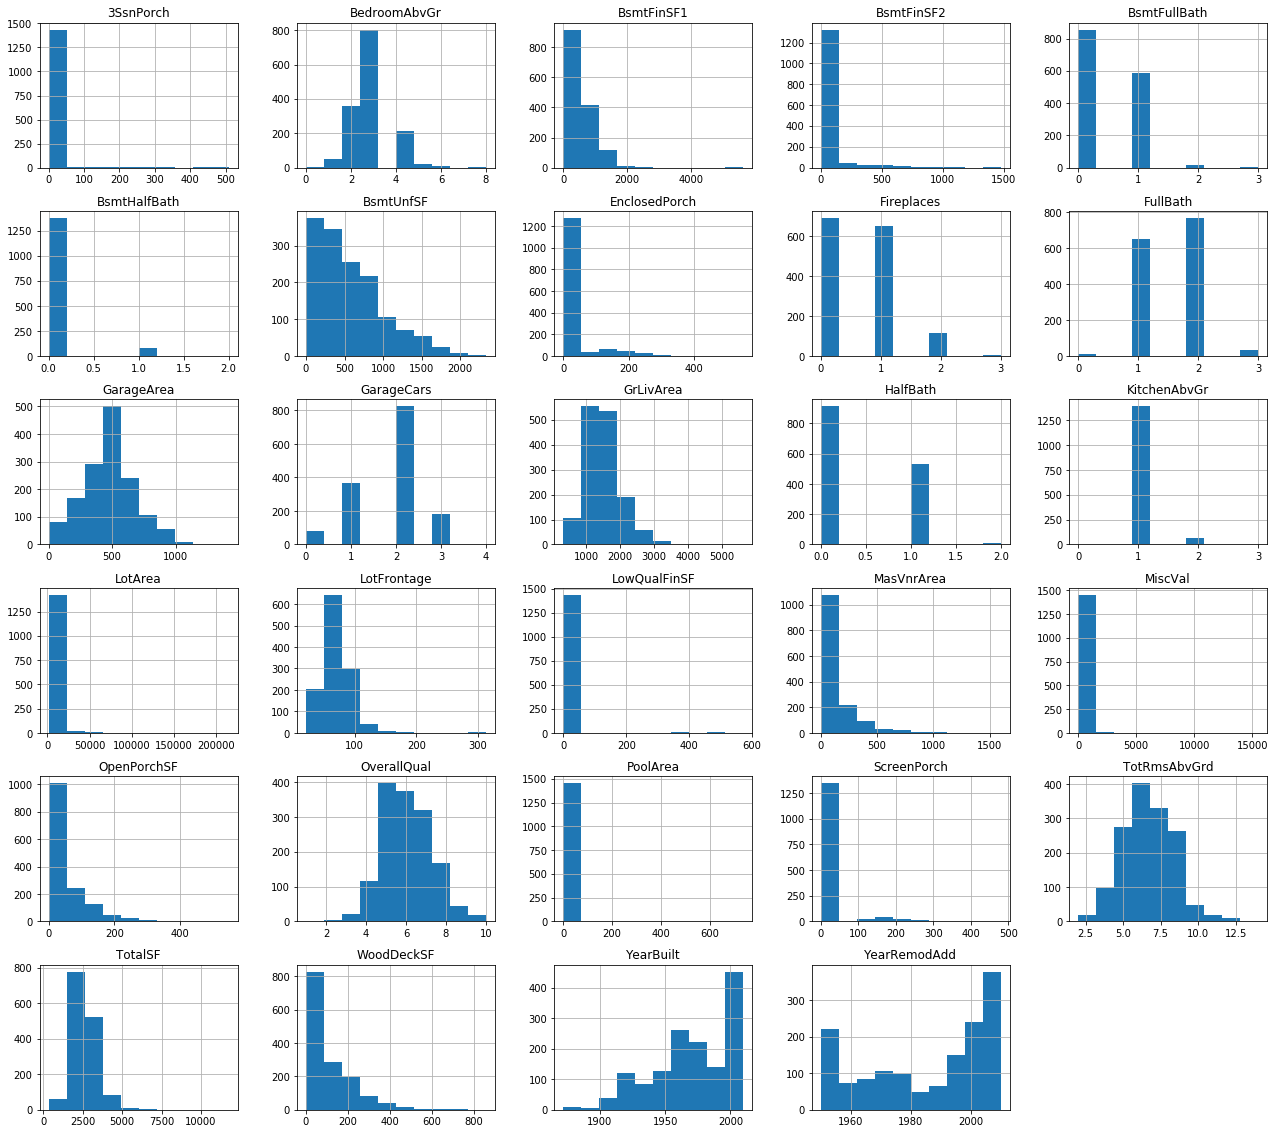

In [21]:
#Histograms
hist_overview = umesh.hist(figsize=(22,20))

### Boxplots:(to check outliers)

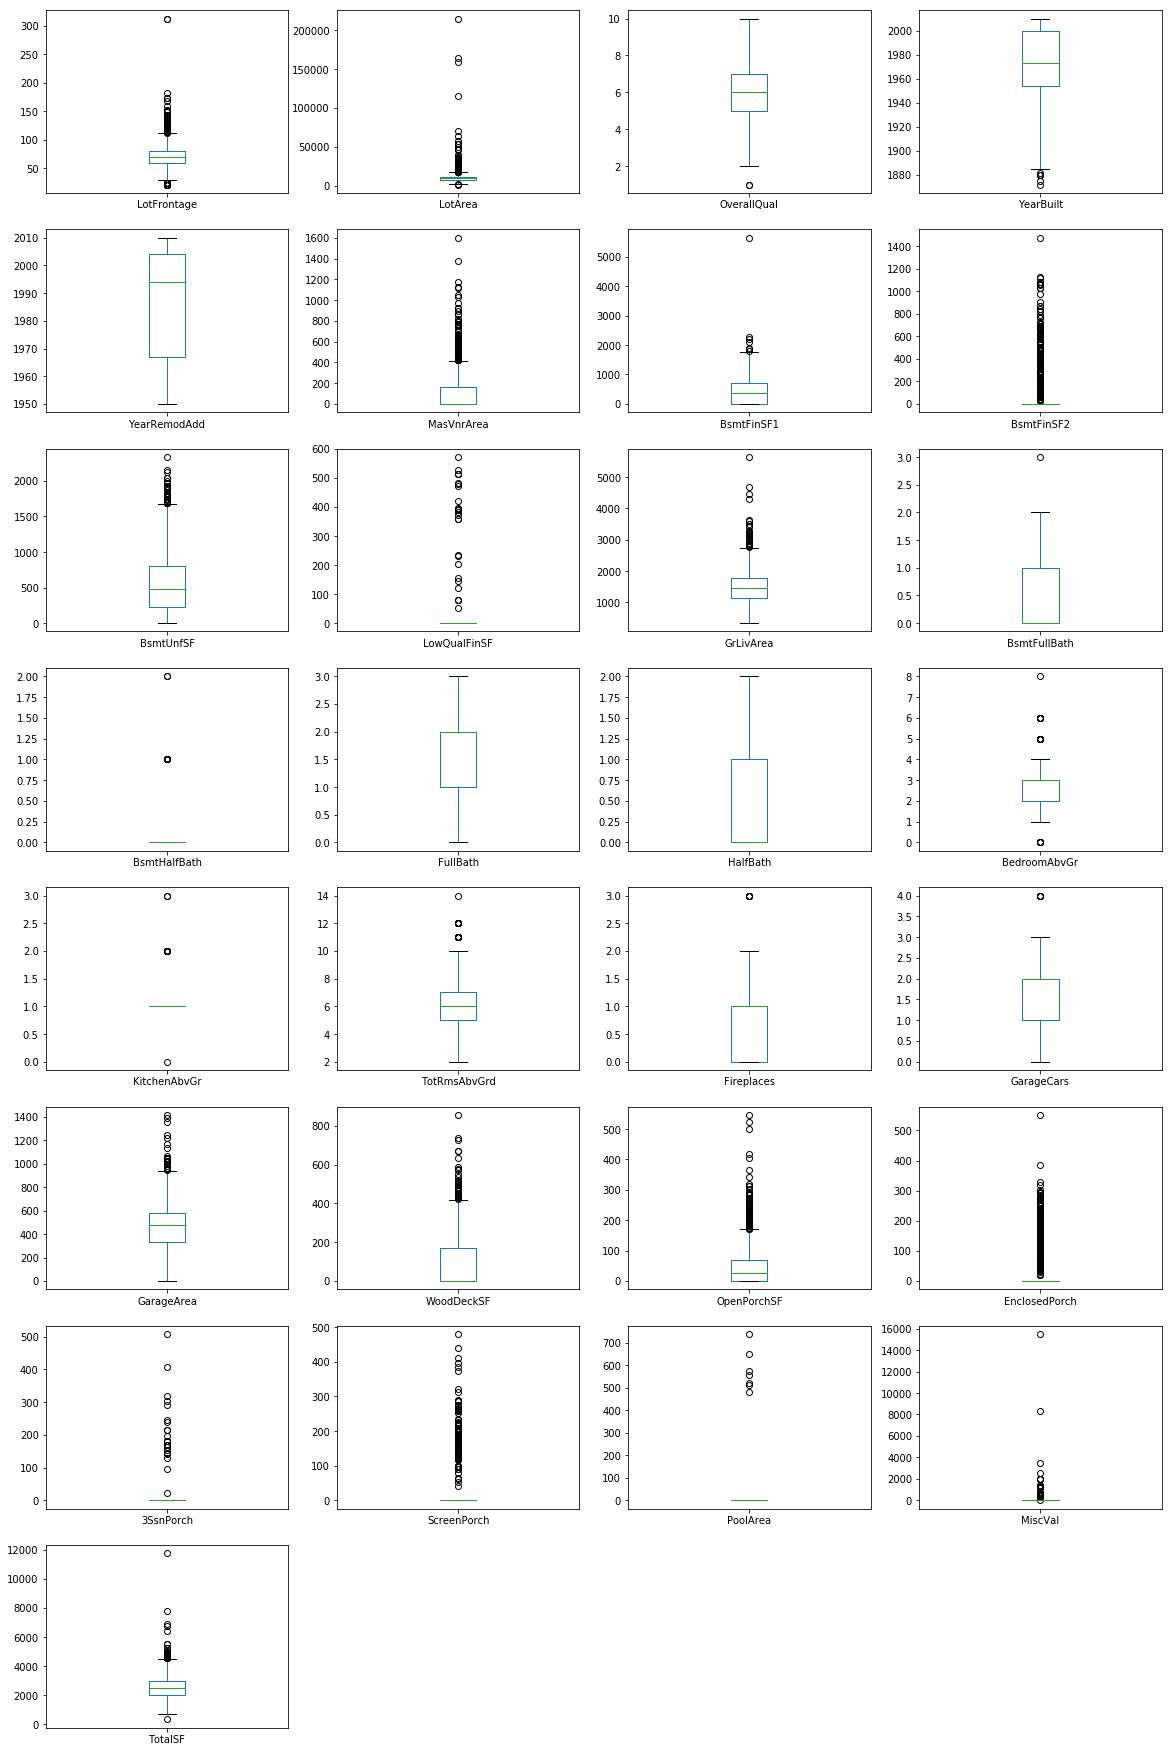

In [22]:
# to check outliers in data
box_overview = umesh.plot(kind='box',subplots=True, layout=(20,4),sharex=False,sharey=False, figsize=(20,80))

### Null Value Imputation:

In [23]:
# similarly handling Null values ,imputing it nwith median
for c in data_num.columns.values:
    data_num = data_num.fillna(data_num[c].median())

### Dummy Values Creation:

In [24]:
# del cat_list

data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [25]:
print("Numerical features : " + str(len(data_num.columns)))
print("Categorical features : " + str(len(data_cat_dummies.columns)))

Numerical features : 30
Categorical features : 246


In [26]:
# using concat function we merging two dataframe for furthere analysis
newdata = pd.concat([data_num, data_cat_dummies], axis=1)

In [27]:
newdata.shape

(1460, 276)

### Correaltion Plot (without condition):

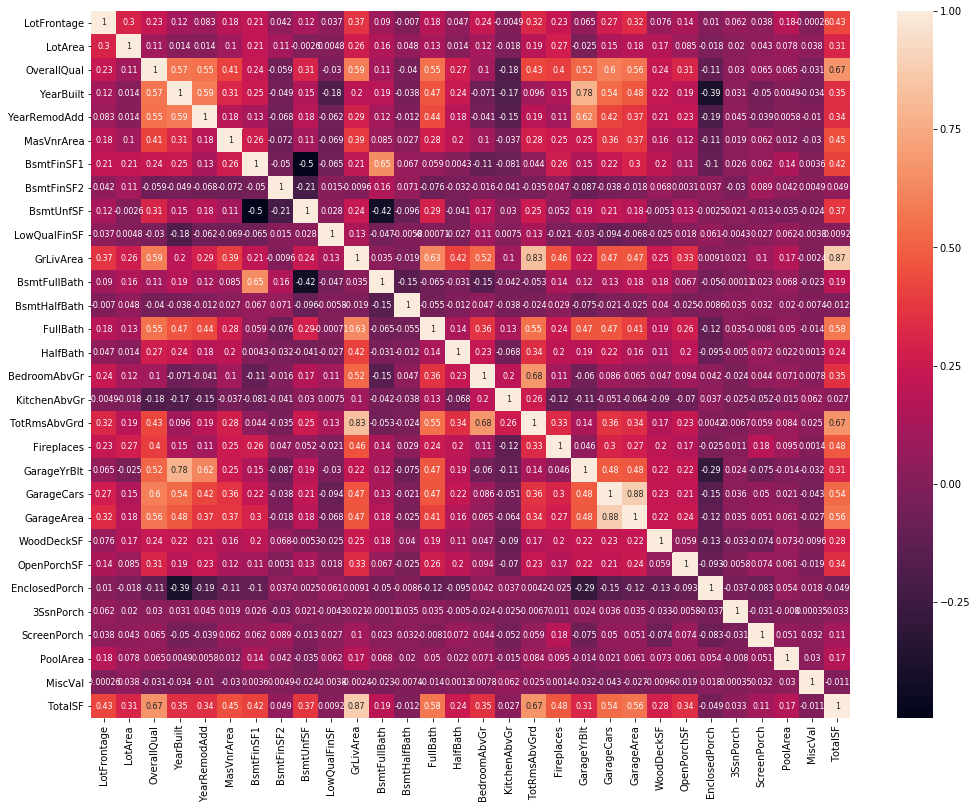

In [28]:
# correlation map
correlation = data_num.corr()
plt.figure(figsize=(17,13))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, annot_kws={"size": 8})

### Correlation plot(with condition of 0.4):

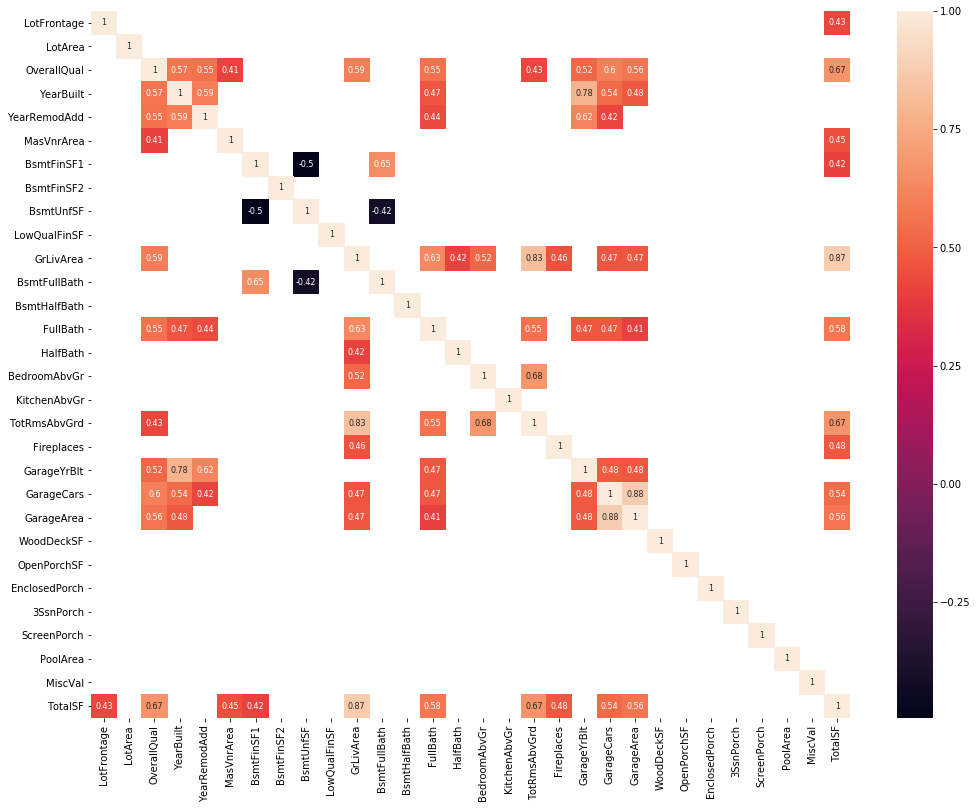

In [29]:
# correaltion map after applying condition for significance of variables
correlation = data_num.corr()
plt.figure(figsize=(17,13))
sns.heatmap(correlation[(correlation > 0.4) | (correlation < -0.4)],  annot=True, annot_kws={"size": 8})

### Data Split:

In [30]:
x_train,x_test, y_train, y_test = train_test_split(newdata, umesh_tar_log, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (1022, 276)
x_test  (438, 276)
y_train  (1022,)
y_test  (438,)


## Model-1(base model):

In [31]:
model1 = sm.OLS(y_train, x_train).fit()

In [32]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     67.23
Date:                Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:01:01   Log-Likelihood:                 1112.2
No. Observations:                1022   AIC:                            -1696.
Df Residuals:                     758   BIC:                            -395.0
Df Model:                         263                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.2031      0.069      2.936      0.003       0.067       0.339
LotArea                   0.7634      0.123      6.197      0.000       0.522       1.005
OverallQual               0.3149      0.050      6.347      0.000       0.218       0.412
YearBuilt                 0.2397      0.065      3.710      0.000       0.113       0.367
YearRemodAdd              0.0471      0.019      2.540      0.011       0.011       0.083
MasVnrArea                0.0408      0.047      0.865      0.387      -0.052       0.133
BsmtFinSF1                0.3791      0.116      3.275      0.001       0.152       0.606
BsmtFinSF2                0.0908      0.061      1.478      0.140      -0.030       0.211
BsmtUnfSF                 0.0542      0.044      1.243      0.214      -0.031       0.140
LowQualFinSF              0.0022      0.058      0.038      0.969      -0.112       0.117
GrLivArea                 1.0088      0.115      8.736      0.000       0.782       1.235
BsmtFullBath              0.0860      0.031      2.782      0.006       0.025       0.147
BsmtHalfBath              0.0582      0.033      1.744      0.082      -0.007       0.124
FullBath                  0.0957      0.036      2.681      0.008       0.026       0.166
HalfBath                  0.0776      0.024      3.295      0.001       0.031       0.124
BedroomAbvGr              0.0030      0.061      0.049      0.961      -0.117       0.123
KitchenAbvGr             -0.1409      0.101     -1.398      0.162      -0.339       0.057
TotRmsAbvGrd              0.0063      0.060      0.105      0.917      -0.112       0.125
Fireplaces                0.0196      0.036      0.540      0.590      -0.052       0.091
GarageYrBlt              -0.0077      0.037     -0.207      0.836      -0.081       0.065
GarageCars                0.0080      0.051      0.157      0.876      -0.092       0.108
GarageArea                0.2050      0.062      3.287      0.001       0.083       0.327
WoodDeckSF                0.0999      0.025      3.926      0.000       0.050       0.150
OpenPorchSF               0.0529      0.031      1.687      0.092      -0.009       0.114
EnclosedPorch             0.0295      0.037      0.805      0.421      -0.042       0.101
3SsnPorch                 0.0252      0.060      0.420      0.675      -0.092       0.143
ScreenPorch               0.1103      0.031      3.547      0.000       0.049       0.171
PoolArea                 -0.1569      0.223     -0.704      0.482      -0.595       0.281
MiscVal                   0.0470      0.100      0.471      0.638      -0.149       0.243
TotalSF                   0.6791      0.050     13.645      0.000       0.581       0.777
MSSubClass_160           -0.1116      0.058     -1.940      0.053      -0.225       0.001
MSSubClass_180         

In [33]:
# function -> getresiduals()
def getresiduals(lm,x_train,y_train):
    predicted = lm.predict(x_train)
    actual = y_train
    residual = actual-predicted
    return(residual)

In [34]:
# 1) Residual mean is 0
# ----------------------------
residuals = getresiduals(model1,x_train,y_train)
print(residuals.mean())


-9.14424005096352e-15


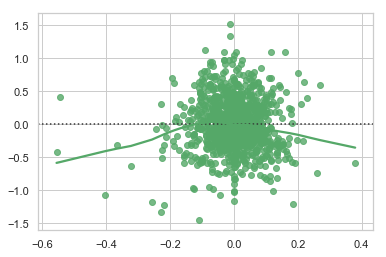

In [35]:
# 2) Residuals have constant variance
# ------------------------------------
y = model1.predict(x_train)
sns.set(style="whitegrid")
sns.residplot(residuals,y,lowess=True,color="g")

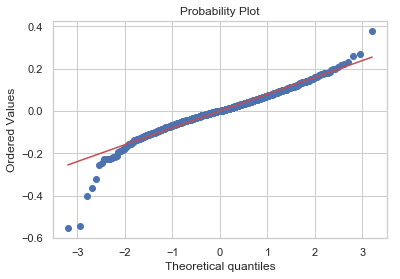

In [36]:
# 3) Residuals are normally distributed
# --------------------------------------
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()

### Cross-Validation:

In [37]:
# cross-validation
# ----------------
# number of folds
kf = KFold(n_splits=5) 
kf.get_n_splits(x_train)
print(kf)

fold = 1
# split the training further into train and test
for train_index, test_index in kf.split(x_train):
    
    # print("Train={0}, Test={1}".format(train_index,test_index))
    
    cv_train_x = x_train.iloc[train_index,]
    cv_train_y = y_train.iloc[train_index,]
    
    cv_test_x = x_train.iloc[test_index,]
    cv_test_y = y_train.iloc[test_index,]
    
    # build the model on the CV training data and predict on CV testing data
    cv_lm = sm.OLS(cv_train_y, cv_train_x).fit()
    cv_pdct = cv_lm.predict(cv_test_x)
    
    # mean square error
    cv_mse = np.mean((cv_pdct - cv_test_y)**2)
    print("Iteration = {0}, MSE = {1}, RMSE = {2}".format(fold,cv_mse,math.sqrt(cv_mse)))
    
    fold+=1

KFold(n_splits=5, random_state=None, shuffle=False)
Iteration = 1, MSE = 0.03165074451676164, RMSE = 0.17790656119649337
Iteration = 2, MSE = 0.18586712428577887, RMSE = 0.4311230964420474
Iteration = 3, MSE = 0.3650920391515244, RMSE = 0.6042284660221864
Iteration = 4, MSE = 0.20852561818693222, RMSE = 0.45664605351073845
Iteration = 5, MSE = 0.12543921319522236, RMSE = 0.3541739871803438


In [38]:
# predict
# -----------------
pdct1 = model1.predict(x_test)
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)

In [39]:
# mean square error
# -----------------
mse = np.mean((pdct1 - y_test)**2)
print("MSE = {0}, RMSE = {1}".format(mse,math.sqrt(mse)))

def rmse(predictions, targets):
    differences = predictions - targets                       # the DIFFERENCEs.
    differences_squared = differences ** 2                    # the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  # the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           # ROOT of ^
    return rmse_val 

MSE = 0.18888634160973972, RMSE = 0.4346105631594102


# Results:

In [40]:
tmp1 = pd.Series({'Model': " Base Linear Regression Model",
                 'R-Squared Value' : model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                 'RMSE': rmse(pdct1, y_test)})

model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.95889,0.944626,0.434611


## Model-2:

In [41]:

# model after adding constant to it

x_train,x_test, y_train, y_test = train_test_split(newdata, umesh_tar_log, test_size = 0.30, random_state=0)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [42]:
model2 = sm.OLS(y_train, x_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     67.23
Date:                Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:01:04   Log-Likelihood:                 1112.2
No. Observations:                1022   AIC:                            -1696.
Df Residuals:                     758   BIC:                            -395.0
Df Model:                         263                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.9839      0.200     44.986      0.000       8.592       9.376
LotFrontage               0.2031      0.069      2.936      0.003       0.067       0.339
LotArea                   0.7634      0.123      6.197      0.000       0.522       1.005
OverallQual               0.3149      0.050      6.347      0.000       0.218       0.412
YearBuilt                 0.2397      0.065      3.710      0.000       0.113       0.367
YearRemodAdd              0.0471      0.019      2.540      0.011       0.011       0.083
MasVnrArea                0.0408      0.047      0.865      0.387      -0.052       0.133
BsmtFinSF1                0.3791      0.116      3.275      0.001       0.152       0.606
BsmtFinSF2                0.0908      0.061      1.478      0.140      -0.030       0.211
BsmtUnfSF                 0.0542      0.044      1.243      0.214      -0.031       0.140
LowQualFinSF              0.0022      0.058      0.038      0.969      -0.112       0.117
GrLivArea                 1.0088      0.115      8.736      0.000       0.782       1.235
BsmtFullBath              0.0860      0.031      2.782      0.006       0.025       0.147
BsmtHalfBath              0.0582      0.033      1.744      0.082      -0.007       0.124
FullBath                  0.0957      0.036      2.681      0.008       0.026       0.166
HalfBath                  0.0776      0.024      3.295      0.001       0.031       0.124
BedroomAbvGr              0.0030      0.061      0.049      0.961      -0.117       0.123
KitchenAbvGr             -0.1409      0.101     -1.398      0.162      -0.339       0.057
TotRmsAbvGrd              0.0063      0.060      0.105      0.917      -0.112       0.125
Fireplaces                0.0196      0.036      0.540      0.590      -0.052       0.091
GarageYrBlt              -0.0077      0.037     -0.207      0.836      -0.081       0.065
GarageCars                0.0080      0.051      0.157      0.876      -0.092       0.108
GarageArea                0.2050      0.062      3.287      0.001       0.083       0.327
WoodDeckSF                0.0999      0.025      3.926      0.000       0.050       0.150
OpenPorchSF               0.0529      0.031      1.687      0.092      -0.009       0.114
EnclosedPorch             0.0295      0.037      0.805      0.421      -0.042       0.101
3SsnPorch                 0.0252      0.060      0.420      0.675      -0.092       0.143
ScreenPorch               0.1103      0.031      3.547      0.000       0.049       0.171
PoolArea                 -0.1569      0.223     -0.704      0.482      -0.595       0.281
MiscVal                   0.0470      0.100      0.471      0.638      -0.149       0.243
TotalSF                   0.6791      0.050     13.645      0.000       0.581       0.777
MSSubClass_160         

In [43]:
# 1) Residual mean is 0
# ----------------------------
residuals = getresiduals(model2,x_train,y_train)
print(residuals.mean())

-9.015619301339627e-15


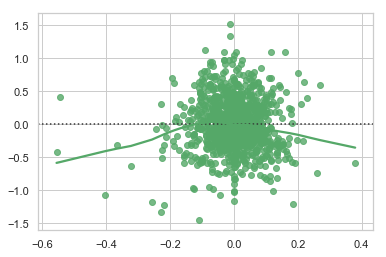

In [44]:
# 2) Residuals have constant variance
# ------------------------------------
y = model2.predict(x_train)
sns.set(style="whitegrid")
sns.residplot(residuals,y,lowess=True,color="g")

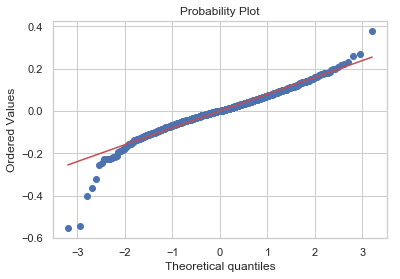

In [45]:
# 3) Residuals are normally distributed
# --------------------------------------
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()

In [46]:
# cross-validation
# ----------------
# number of folds
kf = KFold(n_splits=5) 
kf.get_n_splits(x_train)
print(kf)

fold = 1
# split the training further into train and test
for train_index, test_index in kf.split(x_train):
    
    # print("Train={0}, Test={1}".format(train_index,test_index))
    
    cv_train_x = x_train.iloc[train_index,]
    cv_train_y = y_train.iloc[train_index,]
    
    cv_test_x = x_train.iloc[test_index,]
    cv_test_y = y_train.iloc[test_index,]
    
    # build the model on the CV training data and predict on CV testing data
    cv_lm = sm.OLS(cv_train_y, cv_train_x).fit()
    cv_pdct = cv_lm.predict(cv_test_x)
    
    # mean square error
    cv_mse = np.mean((cv_pdct - cv_test_y)**2)
    print("Iteration = {0}, MSE = {1}, RMSE = {2}".format(fold,cv_mse,math.sqrt(cv_mse)))
    
    fold+=1

KFold(n_splits=5, random_state=None, shuffle=False)
Iteration = 1, MSE = 0.03165074451676261, RMSE = 0.17790656119649612
Iteration = 2, MSE = 0.04765915414538674, RMSE = 0.2183097664910728
Iteration = 3, MSE = 0.04729318131134333, RMSE = 0.2174699549623886
Iteration = 4, MSE = 0.036770415707252896, RMSE = 0.19175613603546796
Iteration = 5, MSE = 0.019321058626940914, RMSE = 0.1390002108881167


In [47]:
# predict
# -----------------
pdct2 = model2.predict(x_test)
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)

In [48]:
# mean square error
# -----------------
mse = np.mean((pdct2 - y_test)**2)
print("MSE = {0}, RMSE = {1}".format(mse,math.sqrt(mse)))

def rmse(predictions, targets):
    differences = predictions - targets                       # the DIFFERENCEs.
    differences_squared = differences ** 2                    # the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  # the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           # ROOT of ^
    return rmse_val 

MSE = 0.0374182450258947, RMSE = 0.19343796169804597


# Results:

In [49]:
tmp2 = pd.Series({'Model': "Model after adding constant term",
                 'R-Squared Value' : model2.rsquared,
                 'Adj.R-Squared Value': model2.rsquared_adj,
                 'RMSE': rmse(pdct2, y_test)})

model2_report = models_report.append(tmp2, ignore_index = True)
model2_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Model after adding constant term,0.95889,0.944626,0.193438


## Model-3:

In [50]:
#model-3
# mode_feature selection
# feature selection - technique 1

X=x_train.iloc[:,1:276]
features = fs(X,y_train,center=True)
features[0]
list(features[0])

df_features = pd.DataFrame({"columns":x_train.columns[1:276], 
                            "score":features[0],
                            "p-val":features[1]
                            })
print(df_features)

# sort on columns
df_features.sort_values(['score'],ascending=False)


                   columns        score          p-val
0              LotFrontage   135.616736   1.624360e-29
1                  LotArea    67.367790   6.751100e-16
2              OverallQual  1896.006036  6.835554e-235
3                YearBuilt   497.952629   3.829117e-90
4             YearRemodAdd   482.878314   6.282378e-88
5               MasVnrArea   226.713800   2.045612e-46
6               BsmtFinSF1   185.472210   6.274518e-39
7               BsmtFinSF2     0.055863   8.132051e-01
8                BsmtUnfSF    42.801018   9.572456e-11
9             LowQualFinSF     0.460336   4.976210e-01
10               GrLivArea  1054.406246  2.062102e-159
11            BsmtFullBath    68.269890   4.396118e-16
12            BsmtHalfBath     0.258608   6.111881e-01
13                FullBath   571.635333  1.161467e-100
14                HalfBath   109.053541   2.528464e-24
15            BedroomAbvGr    53.916706   4.271119e-13
16            KitchenAbvGr    22.112229   2.924822e-06
17        

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,columns,score,p-val
2,OverallQual,1896.006036,6.835554e-235
29,TotalSF,1878.143598,1.571944e-233
10,GrLivArea,1054.406246,2.062102e-159
20,GarageCars,917.992225,2.488120e-144
21,GarageArea,813.340985,5.075970e-132
13,FullBath,571.635333,1.161467e-100
3,YearBuilt,497.952629,3.829117e-90
4,YearRemodAdd,482.878314,6.282378e-88
167,ExterQual_TA,477.062720,4.556714e-87
17,TotRmsAbvGrd,420.043015,1.899542e-78


In [51]:
# model after feature selection: removing variables with least score (less than than 1)
remove1 = ['BsmtFinSF2','BsmtHalfBath','MiscFeature_TenC','LowQualFinSF','SaleCondition_Alloca','PoolArea','SaleType_ConLI',
           'SaleType_Oth','SaleCondition_Family','PoolQC_Fa','Functional_Sev','RoofMatl_Membran','Condition2_RRNn','Condition2_RRAn',
           'Condition2_PosA','BldgType_TwnhsE','Foundation_Stone','Exterior1st_Plywood','HouseStyle_SLvl','ExterCond_Gd',
          'BsmtFinType2_LwQ','LandContour_Lvl','LotConfig_FR2','Exterior2nd_Stucco','MSSubClass_80','Condition2_RRAe','Condition2_PosN']

to_keep = [x for x in x_train if x not in remove1]
print(to_keep)

#print(to_keep)
x_train1 = x_train[to_keep]

['const', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'TotalSF', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Collg

In [52]:
# model after feature selection: removing variables with least score (less than than 1)
remove1 = ['BsmtFinSF2','BsmtHalfBath','MiscFeature_TenC','LowQualFinSF','SaleCondition_Alloca','PoolArea','SaleType_ConLI',
           'SaleType_Oth','SaleCondition_Family','PoolQC_Fa','Functional_Sev','RoofMatl_Membran','Condition2_RRNn','Condition2_RRAn',
           'Condition2_PosA','BldgType_TwnhsE','Foundation_Stone','Exterior1st_Plywood','HouseStyle_SLvl','ExterCond_Gd',
          'BsmtFinType2_LwQ','LandContour_Lvl','LotConfig_FR2','Exterior2nd_Stucco','MSSubClass_80','Condition2_RRAe','Condition2_PosN']

to_keep = [x for x in x_test if x not in remove1]
print(to_keep)

#print(to_keep)
x_test1 = x_test[to_keep]

['const', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'TotalSF', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Collg

In [53]:
model3 = sm.OLS(y_train, x_train1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     62.82
Date:                Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:01:07   Log-Likelihood:                 1030.4
No. Observations:                1022   AIC:                            -1571.
Df Residuals:                     777   BIC:                            -363.1
Df Model:                         244                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.2275      0.162     50.645      0.000       7.909       8.546
LotFrontage               0.1589      0.071      2.244      0.025       0.020       0.298
LotArea                   0.5831      0.125      4.673      0.000       0.338       0.828
OverallQual               0.2813      0.052      5.391      0.000       0.179       0.384
YearBuilt                 0.2023      0.068      2.976      0.003       0.069       0.336
YearRemodAdd              0.0571      0.020      2.914      0.004       0.019       0.096
MasVnrArea                0.0214      0.050      0.428      0.669      -0.077       0.120
BsmtFinSF1                0.0032      0.229      0.014      0.989      -0.445       0.452
BsmtUnfSF                -0.0625      0.095     -0.655      0.513      -0.250       0.125
GrLivArea                 0.5735      0.267      2.145      0.032       0.049       1.098
BsmtFullBath              0.0911      0.030      3.021      0.003       0.032       0.150
FullBath                  0.1136      0.037      3.064      0.002       0.041       0.186
HalfBath                  0.0830      0.025      3.353      0.001       0.034       0.132
BedroomAbvGr              0.0284      0.065      0.441      0.659      -0.098       0.155
KitchenAbvGr             -0.1465      0.105     -1.400      0.162      -0.352       0.059
TotRmsAbvGrd              0.0694      0.063      1.098      0.273      -0.055       0.193
Fireplaces                0.0619      0.038      1.622      0.105      -0.013       0.137
GarageYrBlt              -0.0323      0.039     -0.830      0.407      -0.109       0.044
GarageCars                0.0453      0.054      0.842      0.400      -0.060       0.151
GarageArea                0.2181      0.066      3.320      0.001       0.089       0.347
WoodDeckSF                0.1034      0.027      3.846      0.000       0.051       0.156
OpenPorchSF               0.0422      0.033      1.273      0.203      -0.023       0.107
EnclosedPorch             0.0395      0.038      1.047      0.296      -0.035       0.113
3SsnPorch                 0.0439      0.064      0.689      0.491      -0.081       0.169
ScreenPorch               0.0984      0.033      3.000      0.003       0.034       0.163
MiscVal                   0.0720      0.104      0.693      0.488      -0.132       0.276
TotalSF                   1.2199      0.471      2.592      0.010       0.296       2.144
MSSubClass_160           -0.1379      0.052     -2.626      0.009      -0.241      -0.035
MSSubClass_180           -0.0183      0.076     -0.242      0.809      -0.167       0.131
MSSubClass_190            0.0739      0.142      0.520      0.603      -0.205       0.353
MSSubClass_20             0.0397      0.021      1.870      0.062      -0.002       0.081
MSSubClass_30          

In [54]:
# 1) Residual mean is 0
# ----------------------------
residuals = getresiduals(model3,x_train1,y_train)
print(residuals.mean())

-1.9571211361689648e-15


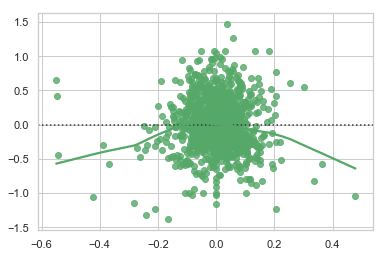

In [55]:
# 2) Residuals have constant variance
# ------------------------------------
y = model3.predict(x_train1)
sns.set(style="whitegrid")
sns.residplot(residuals,y,lowess=True,color="g")

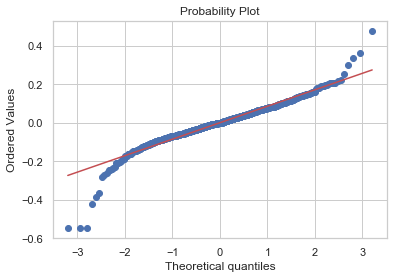

In [56]:
# 3) Residuals are normally distributed
# --------------------------------------
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()

In [57]:
# cross-validation
# ----------------
# number of folds
kf = KFold(n_splits=5) 
kf.get_n_splits(x_train1)
print(kf)

fold = 1
# split the training further into train and test
for train_index, test_index in kf.split(x_train1):
    
    # print("Train={0}, Test={1}".format(train_index,test_index))
    
    cv_train_x = x_train.iloc[train_index,]
    cv_train_y = y_train.iloc[train_index,]
    
    cv_test_x = x_train.iloc[test_index,]
    cv_test_y = y_train.iloc[test_index,]
    
    # build the model on the CV training data and predict on CV testing data
    cv_lm = sm.OLS(cv_train_y, cv_train_x).fit()
    cv_pdct = cv_lm.predict(cv_test_x)
    
    # mean square error
    cv_mse = np.mean((cv_pdct - cv_test_y)**2)
    print("Iteration = {0}, MSE = {1}, RMSE = {2}".format(fold,cv_mse,math.sqrt(cv_mse)))
    
    fold+=1

KFold(n_splits=5, random_state=None, shuffle=False)
Iteration = 1, MSE = 0.03165074451676261, RMSE = 0.17790656119649612
Iteration = 2, MSE = 0.04765915414538674, RMSE = 0.2183097664910728
Iteration = 3, MSE = 0.04729318131134333, RMSE = 0.2174699549623886
Iteration = 4, MSE = 0.036770415707252896, RMSE = 0.19175613603546796
Iteration = 5, MSE = 0.019321058626940914, RMSE = 0.1390002108881167


In [58]:
# predict
# -----------------
pdct3 = model3.predict(x_test1)
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)

In [59]:
# mean square error
# -----------------
mse = np.mean((pdct3 - y_test)**2)
print("MSE = {0}, RMSE = {1}".format(mse,math.sqrt(mse)))

def rmse(predictions, targets):
    differences = predictions - targets                       # the DIFFERENCEs.
    differences_squared = differences ** 2                    # the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  # the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           # ROOT of ^
    return rmse_val 

MSE = 0.0376236533890073, RMSE = 0.19396817622746082


# Results:

In [60]:
tmp3 = pd.Series({'Model': "Model after Feature Selection",
                 'R-Squared Value' : model3.rsquared,
                 'Adj.R-Squared Value': model3.rsquared_adj,
                 'RMSE': rmse(pdct3, y_test)})

model3_report = models_report.append(tmp3, ignore_index = True)
model3_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Model after Feature Selection,0.951757,0.936608,0.193968


## Model-4:

In [61]:
# model-4 :removing insignificant variables using correlation plot
remove2 = ['EnclosedPorch','YearBuilt','GrLivArea','TotRmsAbvGrd','GarageYrBlt','BsmtFinSF1','BsmtUnfSF',
            'BsmtFullBath','GarageCars','GarageArea','TotRmsAbvGrd','TotalSF']

to_keep = [x for x in x_train1 if x not in remove2]
print(to_keep)

#print(to_keep)
x_train2 = x_train1[to_keep]

['const', 'LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd', 'MasVnrArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighbo

In [62]:
remove2 = ['EnclosedPorch','YearBuilt','GrLivArea','TotRmsAbvGrd','GarageYrBlt','BsmtFinSF1','BsmtUnfSF',
           'BsmtFullBath','GarageCars','GarageArea','TotRmsAbvGrd','TotalSF']
to_keep = [x for x in x_test1 if x not in remove2]
print(to_keep)

#print(to_keep)
x_test2 = x_test1[to_keep]

['const', 'LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd', 'MasVnrArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighbo

In [63]:
x_test2.shape

(438, 239)

In [64]:

model4 = sm.OLS(y_train, x_train2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     44.45
Date:                Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:01:10   Log-Likelihood:                 835.06
No. Observations:                1022   AIC:                            -1202.
Df Residuals:                     788   BIC:                            -48.60
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.4279      0.192     43.899      0.000       8.051       8.805
LotFrontage               0.2810      0.083      3.374      0.001       0.118       0.445
LotArea                   0.7937      0.148      5.361      0.000       0.503       1.084
OverallQual               0.5270      0.060      8.840      0.000       0.410       0.644
YearRemodAdd              0.0864      0.023      3.819      0.000       0.042       0.131
MasVnrArea                0.1426      0.059      2.413      0.016       0.027       0.259
FullBath                  0.2959      0.041      7.154      0.000       0.215       0.377
HalfBath                  0.1561      0.028      5.514      0.000       0.101       0.212
BedroomAbvGr              0.2671      0.066      4.064      0.000       0.138       0.396
KitchenAbvGr             -0.0254      0.124     -0.205      0.837      -0.268       0.217
Fireplaces                0.1685      0.044      3.810      0.000       0.082       0.255
WoodDeckSF                0.1649      0.032      5.181      0.000       0.102       0.227
OpenPorchSF               0.0975      0.039      2.483      0.013       0.020       0.175
3SsnPorch                 0.0387      0.076      0.509      0.611      -0.111       0.188
ScreenPorch               0.1147      0.039      2.952      0.003       0.038       0.191
MiscVal                  -0.0458      0.124     -0.368      0.713      -0.290       0.198
MSSubClass_160           -0.2090      0.061     -3.430      0.001      -0.329      -0.089
MSSubClass_180            0.0182      0.090      0.202      0.840      -0.159       0.196
MSSubClass_190            0.2221      0.169      1.310      0.190      -0.111       0.555
MSSubClass_20             0.0953      0.025      3.810      0.000       0.046       0.144
MSSubClass_30            -0.0441      0.039     -1.121      0.263      -0.121       0.033
MSSubClass_40             0.1057      0.111      0.956      0.339      -0.111       0.323
MSSubClass_45            -0.4561      0.199     -2.290      0.022      -0.847      -0.065
MSSubClass_50             0.0676      0.033      2.056      0.040       0.003       0.132
MSSubClass_60             0.0032      0.050      0.065      0.948      -0.094       0.101
MSSubClass_70             0.0673      0.055      1.222      0.222      -0.041       0.175
MSSubClass_75             0.0105      0.094      0.112      0.911      -0.173       0.194
MSSubClass_85             0.2205      0.078      2.826      0.005       0.067       0.374
MSSubClass_90             0.0750      0.027      2.785      0.005       0.022       0.128
MSZoning_FV               0.4446      0.080      5.534      0.000       0.287       0.602
MSZoning_RH               0.3895      0.077      5.050      0.000       0.238       0.541
MSZoning_RL            

In [65]:
# 1) Residual mean is 0
# ----------------------------
residuals = getresiduals(model4,x_train2,y_train)
print(residuals.mean())

-1.2243304869604075e-14


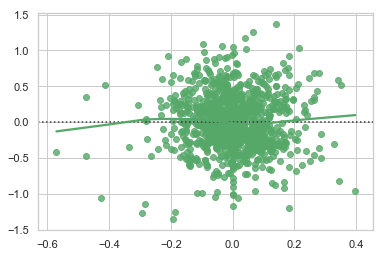

In [66]:
# 2) Residuals have constant variance
# ------------------------------------
y = model4.predict(x_train2)
sns.set(style="whitegrid")
sns.residplot(residuals,y,lowess=True,color="g")

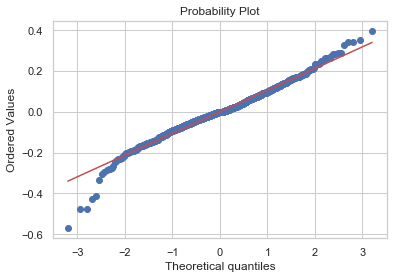

In [67]:
# 3) Residuals are normally distributed
# --------------------------------------
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()

In [68]:
# cross-validation
# ----------------
# number of folds
kf = KFold(n_splits=5) 
kf.get_n_splits(x_train2)
print(kf)

fold = 1
# split the training further into train and test
for train_index, test_index in kf.split(x_train2):
    
    # print("Train={0}, Test={1}".format(train_index,test_index))
    
    cv_train_x = x_train.iloc[train_index,]
    cv_train_y = y_train.iloc[train_index,]
    
    cv_test_x = x_train.iloc[test_index,]
    cv_test_y = y_train.iloc[test_index,]
    
    # build the model on the CV training data and predict on CV testing data
    cv_lm = sm.OLS(cv_train_y, cv_train_x).fit()
    cv_pdct = cv_lm.predict(cv_test_x)
    
    # mean square error
    cv_mse = np.mean((cv_pdct - cv_test_y)**2)
    print("Iteration = {0}, MSE = {1}, RMSE = {2}".format(fold,cv_mse,math.sqrt(cv_mse)))
    
    fold+=1

KFold(n_splits=5, random_state=None, shuffle=False)
Iteration = 1, MSE = 0.03165074451676261, RMSE = 0.17790656119649612
Iteration = 2, MSE = 0.04765915414538674, RMSE = 0.2183097664910728
Iteration = 3, MSE = 0.04729318131134333, RMSE = 0.2174699549623886
Iteration = 4, MSE = 0.036770415707252896, RMSE = 0.19175613603546796
Iteration = 5, MSE = 0.019321058626940914, RMSE = 0.1390002108881167


In [69]:
x_test2.shape

(438, 239)

In [70]:
# predict
# -----------------
pdct4 = model4.predict(x_test2)
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)

In [71]:
# mean square error
# -----------------
mse = np.mean((pdct4 - y_test)**2)
print("MSE = {0}, RMSE = {1}".format(mse,math.sqrt(mse)))

def rmse(predictions, targets):
    differences = predictions - targets                       # the DIFFERENCEs.
    differences_squared = differences ** 2                    # the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  # the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           # ROOT of ^
    return rmse_val 

MSE = 0.036656805227887564, RMSE = 0.19145966997748523


# Results:

In [72]:
tmp4 = pd.Series({'Model': "Model using Correlation plot",
                 'R-Squared Value' : model4.rsquared,
                 'Adj.R-Squared Value': model3.rsquared_adj,
                 'RMSE': rmse(pdct4, y_test)})

model4_report = models_report.append(tmp4, ignore_index = True)
model4_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Model using Correlation plot,0.92929,0.936608,0.19146


# Overall Models Comparision:

In [73]:
# Comparison of various model
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
clas_model = pd.DataFrame(columns = cols)
clas_model = clas_model.append([model1_report,model2_report,model3_report,model4_report])
clas_model

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.958890,0.944626,0.434611
0,Model after adding constant term,0.958890,0.944626,0.193438
0,Model after Feature Selection,0.951757,0.936608,0.193968
0,Model using Correlation plot,0.929290,0.936608,0.191460
